# Telecom Data - Basic Exploratory Data Visualization (data from August 2017)

#### Data visualization of data preprocessed through data transformation on PostgreSQL.


In [1]:
# database connection library + database information
from db_configs import host, database, user, password
import psycopg2 as pg

# data manipulation libraries
import pandas as pd
import geopandas as gpd 
from shapely.geometry import Point # convert coordinates to points
import numpy as np
from datetime import datetime

# data visualization libraries
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
import cufflinks as cf # Cufflinks binds plotly to pandas dataframes in IPython notebook.
import matplotlib.pyplot as plt
import seaborn as sns # for color palettes

cf.set_config_file(offline=False, world_readable=True, theme='pearl')

# to create visualizations gifs
import glob
import os

# Turn on retina mode and set configurations
from IPython.display import set_matplotlib_formats
import IPython

set_matplotlib_formats('retina')
%matplotlib inline
plotly.offline.init_notebook_mode()
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

# connect to the database
connection = pg.connect(host=host, dbname=database, user=user, password=password)

viz_out = 'plotly_viz/'

## Nationalities Table

In [3]:
# import nationalities table:
nationalities = pd.read_sql_query("SELECT * FROM telecom_pt.viz_tourists_per_origin ORDER BY tourists_per_origin desc",con=connection)
nationalities['avg_length_of_stay'] = nationalities['avg_length_of_stay'].astype(datetime)

def number_of_days_as_float(val):
    return val.days+val.seconds/86400

nationalities['avglgth_of_stay_as_float'] = nationalities['avg_length_of_stay'].apply(number_of_days_as_float)
nationalities.columns

Index(['country_of_origin', 'tourists_per_origin', 'avg_length_of_stay',
       'avglgth_of_stay_as_float'],
      dtype='object')

In [6]:

nationalities['%_tourists'] = (nationalities['tourists_per_origin']/nationalities['tourists_per_origin'].sum())*100
nationalities[['country_of_origin','tourists_per_origin','avglgth_of_stay_as_float','%_tourists']]


country_of_origin  tourists_per_origin  avglgth_of_stay_as_float  \
0                  France               836844                 11.150752   
1                   Spain               622418                  3.960775   
2          United Kingdom               288994                  5.433333   
3                 Germany               116209                  4.080347   
4             Netherlands                93109                  5.413843   
5             Switzerland                81738                  7.939201   
6              Luxembourg                65112                 11.287928   
7                 Belgium                60136                  7.054861   
8                   Italy                58781                  3.803032   
9                  Poland                38049                  4.778762   
10                Ireland                27021                  5.255949   
11          United States                23073                  2.838275   
12                 Brazil                19230                  4.273194   
13                 Angola                16851                  6.173924   
14     Russian Federation                15277                  5.230081   
15                 Sweden                13730                  6.106157   
16                Austria                12285                  5.396076   
17                Romania                 8000                  5.166100   
18             Czech Rep.                 6976                  4.622269   
19                Ukraine                 6900                  7.048866   
20                Andorra                 5514                  9.845579   
21                  China                 5184                  3.035289   
22                 Canada                 5177                  3.784259   
23                Denmark                 4171                  2.591528   
24                Hungary                 3354                  4.155891   
25               Slovakia                 3309                  4.662326   
26              Australia                 3213                  4.879352   
27                Morocco                 3071                  2.202234   
28                Finland                 2950                  4.330301   
29          Guinea-Bissau                 2358                  7.611690   
..                    ...                  ...                       ...   
128              Cambodia                    6                  0.606701   
129           El Salvador                    6                  1.189363   
130                Jordan                    4                  0.828032   
131             Indonesia                    4                  0.663183   
132                  Cuba                    4                  0.055556   
133            Madagascar                    4                 15.161725   
134             Guatemala                    4                  0.148704   
135      French Polynesia                    4                  1.948495   
136              Botswana                    3                  2.492894   
137                  Fiji                    3                  7.335660   
138                  None                    3                  0.000000   
139              Maldives                    3                  9.789062   
140               Liberia                    3                 14.155139   
141                 Gabon                    2                  0.094340   
142                 Libya                    2                  0.973785   
143           Philippines                    2                 14.791377   
144                Malawi                    2                  0.000000   
145                 Niger                    2                  1.087616   
146             Sri Lanka                    2                  0.019167   
147            Uzbekistan                    2                  0.003148   
148                Belize                    2          

In [8]:
trace_data = nationalities.nlargest(20, 'tourists_per_origin', keep='first')

trace1 = {
  "x": trace_data['country_of_origin'],
  "y": trace_data['tourists_per_origin'], 
  "marker": {"color": "rgb(151, 160, 160)"}, 
  "name": "Number of Tourists per Origin", 
  "type": "bar", 
  "uid": "247a10", 
  "xsrc": "qiweihan:653:a556e9", 
  "ysrc": "qiweihan:653:582f23",
  "text": ["Relative Frequency: "+str("{0:.2f}".format(nbr))+'%' for nbr in trace_data['%_tourists']]
}
data = go.Data([trace1])
layout = {
  "autosize": True, 
  "dragmode": "lasso", 
  "hovermode": "x", 
  "title": "Number of Tourists per Origin", 
  "xaxis": {
    "autorange": True, 
    "range": [-0.5, 56.5], 
    "showspikes": False, 
    "title": "Countries", 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [0, 106.383682389], 
    "showspikes": False, 
    "title": "Tourist Count", 
    "type": "linear"
  }
}
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=viz_out+'number_of_tourists_per_origin.html', show_link=False, auto_open=False)
plotly.offline.iplot(fig, show_link=False)

In [4]:
trace_data = nationalities.nlargest(20, 'tourists_per_origin', keep='first').sort_values('avglgth_of_stay_as_float', ascending=False)

trace1 = {
  "x": trace_data['country_of_origin'],
  "y": trace_data['avglgth_of_stay_as_float'], 
  "marker": {"color": "rgb(151, 160, 160)"}, 
  "name": "Average Length of Stay per Origin", 
  "type": "bar", 
  "uid": "247a10", 
  "xsrc": "qiweihan:653:a556e9", 
  "ysrc": "qiweihan:653:582f23",
  "text": ["# of Tourists: "+str(nbr)+'%' for nbr in "{0:.2f}".format(trace_data['tourists_per_origin'])]
}
data = go.Data([trace1])
layout = {
  "autosize": True, 
  "dragmode": "lasso", 
  "hovermode": "x", 
  "title": "Average Length of Stay per Origin", 
  "xaxis": {
    "autorange": True, 
    "range": [-0.5, 56.5], 
    "showspikes": False, 
    "title": "Countries", 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [0, 106.383682389], 
    "showspikes": False, 
    "title": "Average Stay", 
    "type": "linear"
  }
}
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=viz_out+'length_of_stay_per_origin.html', show_link=False, auto_open=False)
plotly.offline.iplot(fig, show_link=False)


## Number of tourists per days of stay

In [5]:
# import nationalities table:
length_of_stay = pd.read_sql_query("SELECT * FROM telecom_pt.viz_tourists_per_length_stay ORDER BY days_of_stay asc;",con=connection)

length_of_stay.columns

Index(['days_of_stay', 'tourists_per_days_of_stay'], dtype='object')

In [6]:
trace_data = length_of_stay[length_of_stay['days_of_stay']!=0]\
                .sort_values('days_of_stay', ascending=True)

trace1 = {
  "x": trace_data['days_of_stay'],
  "y": trace_data['tourists_per_days_of_stay']/trace_data['tourists_per_days_of_stay'].sum(), 
  "marker": {"color": "rgb(151, 160, 160)"}, 
  "name": "Number of tourists per days of Stay", 
  "type": "bar", 
  "uid": "247a10", 
  "xsrc": "qiweihan:653:a556e9", 
  "ysrc": "qiweihan:653:582f23",
  #"text": ["# of Tourists: "+str(nbr) for nbr in trace_data['tourists_per_origin']]
}
data = go.Data([trace1])
layout = {
  "autosize": True, 
  "dragmode": "lasso", 
  "hovermode": "x", 
  "title": "Days of Stay", 
  "xaxis": {
    "autorange": True, 
    "range": [-0.5, 56.5], 
    "showspikes": False, 
    "title": "Number of days", 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [0, 106.383682389], 
    "showspikes": False, 
    "title": "Number of Tourists", 
    "type": "linear"
  }
}
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=viz_out+'days_of_stay.html', show_link=False, auto_open=False)
plotly.offline.iplot(fig, show_link=False)


In [8]:
origins_per_day = pd.read_sql_query("select * from viz_tourists_per_origin_per_day",con=connection)

def bin_countries(val):
    europe_others = [
                     'Albania','Andorra','Armenia','Austria','Azerbaijan','Belarus','Belgium',
                     'Bosnia and Herzegovina','Bulgaria','Croatia','Cyprus','Czech Republic',
                     'Denmark','Estonia','Finland','Georgia','Greece','Hungary','Iceland','Ireland',
                     'Italy','Kazakhstan','Kosovo','Latvia','Liechtenstein','Malta','Moldova','Monaco','Montenegro',
                     'Lithuania','Norway','Poland','Romania','Russia','San Marino','Serbia','Slovakia','Slovenia',
                     'Sweden','Turkey','Ukraine'
                    ]
    chinas = ['Hongkong China', 'Macao China']
    countries = ['France', 'Switzerland', 'Belgium', 'Spain', 'United Kingdom', 'United States', 'Netherlands',
                 'Germany', 'China', 'Luxembourg','Rest of Europe']
    if val in chinas:
        val = 'China'
    elif val in europe_others:
        val = 'Rest of Europe'
    
    if val in countries:
        return val
    else:
        return 'Others'



origins_per_day['day'] = origins_per_day['day'].astype(int)

origins_per_day['binned_origins'] = origins_per_day['origin'].apply(bin_countries)

binned_daily_origins = origins_per_day[['day', 'binned_origins', 'count_of_tourists']].groupby(['day', 'binned_origins']).sum().reset_index()



In [9]:

binned_or = list(binned_daily_origins['binned_origins'].unique())
trace_list= []

for origin in binned_or:
    trace_list.append({
      "x": binned_daily_origins[binned_daily_origins['binned_origins']==origin]['day'],
      "y": binned_daily_origins[binned_daily_origins['binned_origins']==origin]['count_of_tourists'], 
      #"marker": {"color": "rgb(151, 160, 160)"}, 
      "name": origin, 
      "type": "bar", 
      "uid": "247a10", 
      "xsrc": "qiweihan:653:a556e9", 
      "ysrc": "qiweihan:653:582f23",
      #"text": ["# of Tourists: "+str(nbr) for nbr in trace_data['tourists_per_origin']]
    })

data = go.Data(trace_list)
layout = {
  "barmode": "stack",
  "autosize": True, 
  "dragmode": "lasso", 
  "hovermode": "compare", 
  "title": "Tourists each day", 
  "xaxis": {
    "autorange": True, 
    #"range": [-0.5, 56.5], 
    "showspikes": False, 
    "title": "Day of month (August)", 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    #"range": [0, 106.383682389], 
    "showspikes": False, 
    "title": "Number of Tourists", 
    "type": "linear"
  }
}
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=viz_out+'origins_day.html', show_link=False, auto_open=False)
plotly.offline.iplot(fig, show_link=False)



In [ ]:
origins_per_day

# Tourists per district

In [10]:
# import nationalities table:
length_of_stay = pd.read_sql_query("SELECT * FROM telecom_pt.viz_avgstay_per_district",con=connection)
length_of_stay = length_of_stay[length_of_stay['distrito'].notnull()]
print(length_of_stay.columns)

shp_dir = '/home/jfonseca/tourism_proj/pt_regions_shapefiles/'
portugal = gpd.read_file(shp_dir+'gadm36_PRT.gpkg')\
            .rename(columns={'NAME_0':'country','NAME_1':'distrito', 'NAME_2':'concelho', 'NAME_3':'municipio' })\
            [['country','distrito','concelho','municipio','geometry']]

distritos = portugal[['distrito', 'geometry']].dissolve(by='distrito').reset_index()
distritos = distritos[~distritos['distrito'].isin(['Azores','Madeira'])]
# merge data into a single dataframe
distritos = distritos.merge(length_of_stay, on='distrito', how='left')

Index(['distrito', 'count_of_tourists', 'avg_stay_in_pt'], dtype='object')


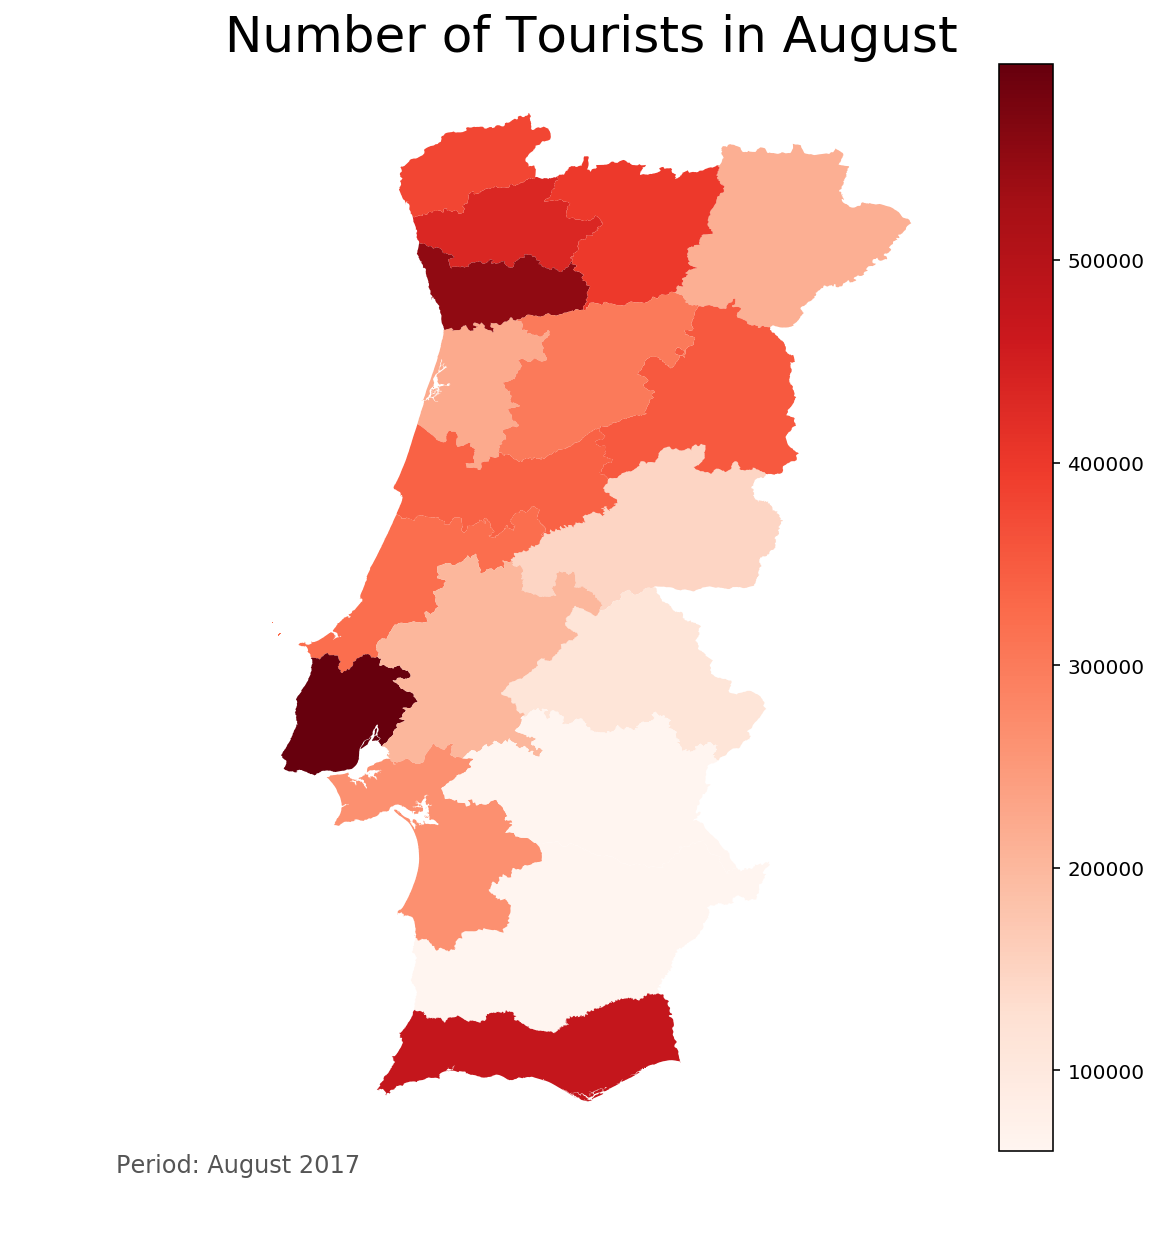

In [11]:
set_matplotlib_formats('retina')
%matplotlib inline

ax = distritos[['count_of_tourists', 'geometry']].plot(column='count_of_tourists', 
                                                       cmap='Reds',
                                                       #edgecolor='0.0',
                                                       figsize=(10, 10),
                                                       legend=True
                                                      )
# set the range for the choropleth
#vmin, vmax = 120, 220
ax.set_title('Number of Tourists in August', fontdict={'fontsize': 25, 'fontweight' : 3})
ax.annotate('Period: August 2017', xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
ax.axis('off')


# Make a color bar legend
#sm = plt.cm.ScalarMappable(cmap='Blues', 
#                           #norm=plt.Normalize(vmin=vmin, vmax=vmax)
#                          )
#sm._A = []
#cbar = fig.colorbar(sm)

#plt.imshow(ax)
#plt.colorbar()
plt.show()

# Length of stay per district

In [2]:
# import Average Length of stay table:
length_of_stay = pd.read_sql_query("select * from telecom_pt.viz_length_per_district",con=connection)
length_of_stay = length_of_stay[length_of_stay['distrito'].notnull()]
print(length_of_stay.columns)

shp_dir = '/home/jfonseca/tourism_proj/pt_regions_shapefiles/'
portugal = gpd.read_file(shp_dir+'gadm36_PRT.gpkg')\
            .rename(columns={'NAME_0':'country','NAME_1':'distrito', 'NAME_2':'concelho', 'NAME_3':'municipio' })\
            [['country','distrito','concelho','municipio','geometry']]

distritos = portugal[['distrito', 'geometry']].dissolve(by='distrito').reset_index()
distritos = distritos[~distritos['distrito'].isin(['Azores','Madeira'])]
# merge data into a single dataframe
distritos = distritos.merge(length_of_stay, on='distrito', how='left')

distritos['avg_stay_in_pt2'] = distritos['avg_stay_in_pt'].dt.total_seconds() / (24 * 60 * 60)

Index(['distrito', 'avg_stay_in_pt'], dtype='object')


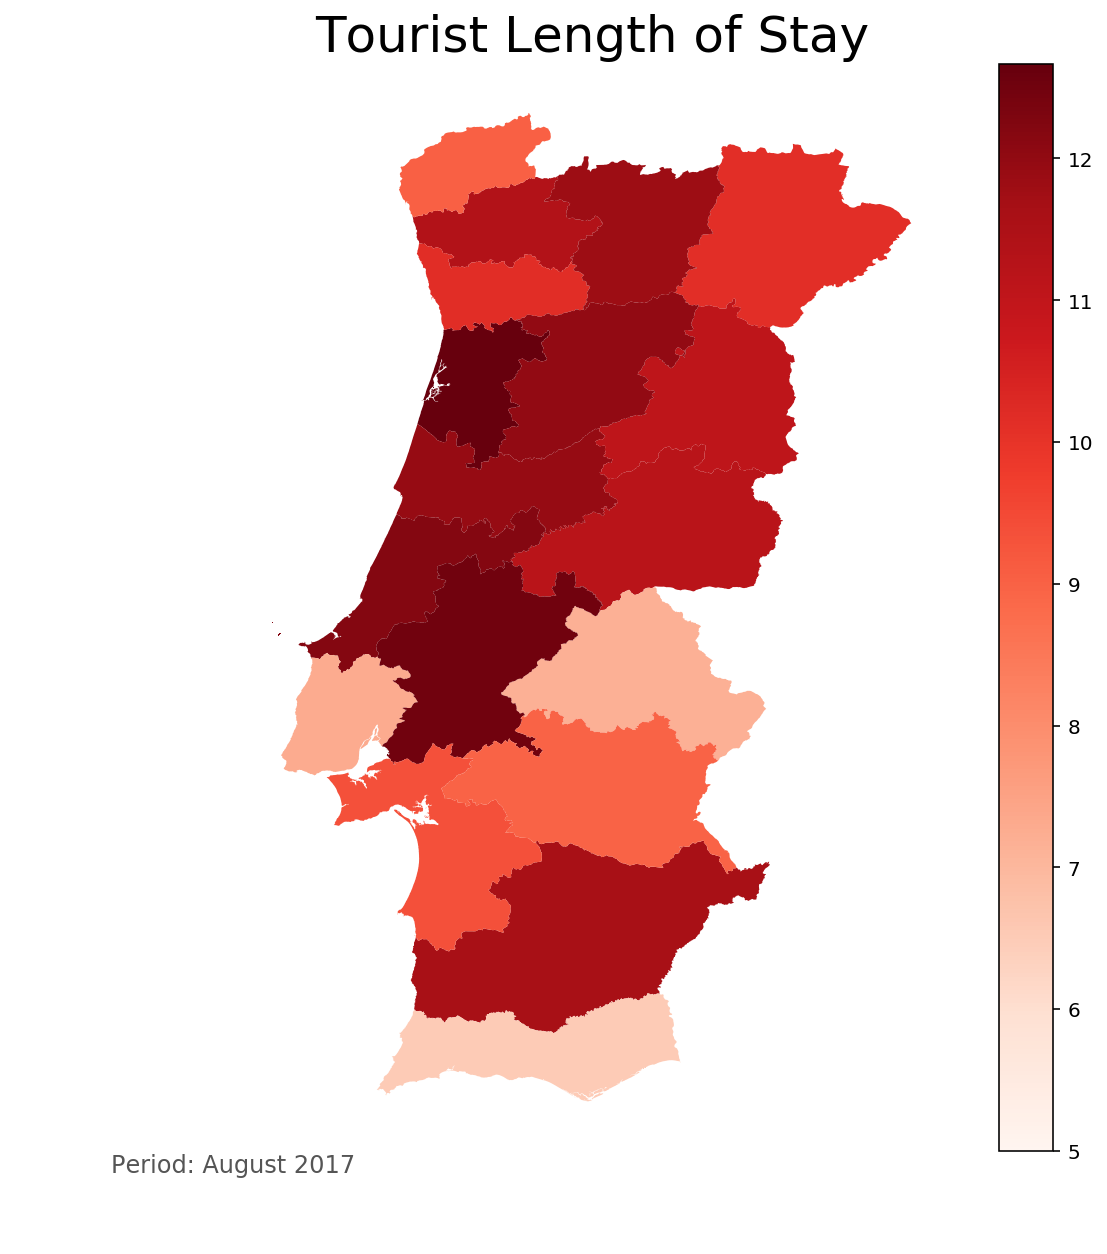

In [7]:
set_matplotlib_formats('retina')
%matplotlib inline

ax = distritos[['avg_stay_in_pt2', 'geometry']].plot(column='avg_stay_in_pt2', 
                                                       cmap='Reds',
                                                       #edgecolor='0.0',
                                                       figsize=(10, 10),
                                                       legend=True,
                                                       vmin=5
                                                      )
# set the range for the choropleth
#vmin, vmax = 120, 220
ax.set_title('Tourist Length of Stay', fontdict={'fontsize': 25, 'fontweight' : 3})
ax.annotate('Period: August 2017', xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
ax.axis('off')


# Make a color bar legend
#sm = plt.cm.ScalarMappable(cmap='Blues', 
#                           #norm=plt.Normalize(vmin=vmin, vmax=vmax)
#                          )
#sm._A = []
#cbar = fig.colorbar(sm)

#plt.imshow(ax)
#plt.colorbar()
plt.show()

## Number of tourists per days of stay

In [14]:
# import nationalities table:
daily_tourists = pd.read_sql_query("SELECT * FROM telecom_pt.viz_tourists_per_day ORDER BY day_of_month, distrito;",con=connection)
daily_tourists = daily_tourists[daily_tourists['distrito'].notnull()]
daily_tourists = daily_tourists[~daily_tourists['distrito'].isin(['Azores','Madeira'])]
daily_tourists['day_of_month'] = daily_tourists['day_of_month'].astype('int')
print(daily_tourists.columns)

# select regions of analysis and columns of interest
daily_distritos = portugal[['distrito', 'geometry']].dissolve(by='distrito').reset_index()

# merge data into a single dataframe
daily_tourists = daily_distritos.merge(daily_tourists, on='distrito', how='right')



Index(['day_of_month', 'distrito', 'daily_tourist_count'], dtype='object')


In [15]:
day=1
plots_districts_dir = 'districts_daily_plots/'
while day<31:
    ax = daily_tourists[daily_tourists['day_of_month'].astype(int)==day][['daily_tourist_count', 'geometry']]\
                                    .plot(column='daily_tourist_count', 
                                          cmap='Reds',
                                          #edgecolor='0.0',
                                          figsize=(10, 10),
                                          legend=True,
                                          vmin=0, 
                                          vmax=75000
                                         )
    # set the range for the choropleth
    #vmin, vmax = 120, 220
    ax.set_title('Number of Tourists in August', fontdict={'fontsize': 25, 'fontweight' : 3})
    ax.annotate('%s August 2017' % day, xy=(0.1, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
    ax.axis('off')
    
    plt.savefig(fname=plots_districts_dir+'day_%s_telecom.eps' % day,
                #dpi=500,
                format='eps'
               
               )
    plt.close()
    day+=1
    

gif_name = 'tourists_per_day'
file_list = glob.glob(plots_districts_dir+'*.eps') # Get all the pngs in the current directory
list.sort(file_list, key=lambda x: int(x.split('_')[3].split('.eps')[0])) # Sort the images by #, this may need to be tweaked for your use case

with open('image_list.txt', 'w') as file:
    for item in file_list:
        file.write("%s\n" % item)

os.system('convert @image_list.txt {}.gif'.format(gif_name))
os.system('rm {}'.format('image_list.txt'))

iframe = '<iframe src=' + gif_name + '.gif' + ' width=100% height=750px></iframe>'
IPython.display.HTML(iframe)

## Weekday Analysis

In [16]:
weekday_arrival = pd.read_sql_query("SELECT * FROM telecom_pt.viz_weekday_arrival;",con=connection)
print('arrival columns: ',weekday_arrival.columns)
weekday_departure = pd.read_sql_query("SELECT * FROM telecom_pt.viz_weekday_departure;",con=connection)
print('departure columns: ',weekday_departure.columns)

arrival columns:  Index(['weekday_of_arrival', 'number_of_tourists'], dtype='object')
departure columns:  Index(['weekday_of_departure', 'number_of_tourists'], dtype='object')


In [17]:
# weekday arrival
weekday_arrival['weekday_of_arrival'] = weekday_arrival['weekday_of_arrival'].astype(int)
weekday_arrival = weekday_arrival.sort_values('weekday_of_arrival')

weekday_arrival['weekday'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

total_tourists = weekday_arrival['number_of_tourists'].sum()

weekday_arrival['%_of_tourists_arrival'] = weekday_arrival['number_of_tourists']/total_tourists
weekday_arrival

weekday_of_arrival  number_of_tourists    weekday  %_of_tourists_arrival
4                   1              284240     Monday               0.114587
1                   2              564470    Tuesday               0.227557
3                   3              351896  Wednesday               0.141861
0                   4              338593   Thursday               0.136499
6                   5              295622     Friday               0.119175
5                   6              357752   Saturday               0.144222
2                   7              287989     Sunday               0.116098

In [18]:
# weekday departure
weekday_departure['weekday_of_departure'] = weekday_departure['weekday_of_departure'].astype(int)
weekday_departure = weekday_departure.sort_values('weekday_of_departure')

weekday_departure['weekday'] = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

total_tourists = weekday_departure['number_of_tourists'].sum()
weekday_departure['%_of_tourists_departure'] = weekday_departure['number_of_tourists']/total_tourists


# merge data
weekday_viz = weekday_departure.merge(weekday_arrival, on='weekday', how='inner')

weekday_viz[['weekday','%_of_tourists_arrival','%_of_tourists_departure']]

weekday  %_of_tourists_arrival  %_of_tourists_departure
0     Monday               0.114587                 0.137949
1    Tuesday               0.227557                 0.132030
2  Wednesday               0.141861                 0.210075
3   Thursday               0.136499                 0.124749
4     Friday               0.119175                 0.125788
5   Saturday               0.144222                 0.138673
6     Sunday               0.116098                 0.130737

In [19]:
trace_data = weekday_viz[['weekday','%_of_tourists_arrival','%_of_tourists_departure']]

trace1 = {
  "x": trace_data['weekday'],
  "y": trace_data['%_of_tourists_arrival'], 
  "marker": {"color": "rgb(231, 76, 60)"}, 
  "name": "Arrival", 
  "type": "bar", 
  "uid": "247a10", 
  "xsrc": "qiweihan:653:a556e9", 
  "ysrc": "qiweihan:653:582f23",
  #"text": ["# of Tourists: "+str(nbr) for nbr in trace_data['tourists_per_origin']]
}

trace2 = {
  "x": trace_data['weekday'],
  "y": trace_data['%_of_tourists_departure'], 
  "marker": {"color": "rgb(151, 160, 160)"}, 
  "name": "Departure", 
  "type": "bar", 
  "uid": "247a10", 
  "xsrc": "qiweihan:653:a556e9", 
  "ysrc": "qiweihan:653:582f23",
  #"text": ["# of Tourists: "+str(nbr) for nbr in trace_data['tourists_per_origin']]
}

data = go.Data([trace1, trace2])
layout = {
  "autosize": True, 
  "dragmode": "lasso", 
  "hovermode": "x", 
  "title": "Tourists per Weekday", 
  "xaxis": {
    "autorange": True, 
    "range": [-0.5, 56.5], 
    "showspikes": False, 
    "title": "Weekday", 
    "type": "category"
  }, 
  "yaxis": {
    "autorange": True, 
    "range": [0, 106.383682389], 
    "showspikes": False, 
    "title": "Percentage of Tourists", 
    "type": "linear"
  }
}
fig = go.Figure(data=data, layout=layout)
plotly.offline.plot(fig, filename=viz_out+'weekday_analysis.html', show_link=False, auto_open=True)
plotly.offline.iplot(fig, show_link=False)


## Tourist flows in lisbon in days with cruises

In [1]:
cruise_ships = pd.read_sql_query("SELECT * FROM telecom_pt.viz_cruise_ships;",con=connection)
"""
columns: 
    day_of_month, 
    hour_of_day, 
    minute_of_hour, 
    client_id, 
    origin, 
    lat, 
    lon
"""
# Convert to datetime

def add_zero_and_format(val):
    if val<10:
        return '0'+str(int(val))
    else:
        return str(int(val))

cruise_ships['date_str'] = pd.to_datetime('2017-08-'+cruise_ships['day_of_month'].apply(add_zero_and_format)\
                                            +' '+cruise_ships['hour_of_day'].apply(add_zero_and_format)+':'\
                                            +cruise_ships['minute_of_hour'].apply(add_zero_and_format)+':00')
# Index datetime
cruise_ships = cruise_ships.set_index('date_str')

# Resample and interpolate
cruises_upsampled = cruise_ships[['client_id','lat','lon']].groupby('client_id').resample('1T').asfreq().interpolate('linear')
cruises_upsampled = cruises_upsampled[['lat', 'lon']].reset_index()



NameError: name 'pd' is not defined

In [2]:
# add origins to table
id_origin = cruise_ships[['client_id','origin']].groupby(['client_id','origin']).count().reset_index()
cruises_upsampled = cruises_upsampled.merge(id_origin, on='client_id')

#cruises_upsampled['day'] = cruises_upsampled['date_str'].dt.day
#cruises_upsampled['hour'] = cruises_upsampled['date_str'].dt.hour
#cruises_upsampled['minute'] = cruises_upsampled['date_str'].dt.minute

# Convert to HDF
cruises_upsampled.to_hdf('out_data/cruises_upsampled.h5',key='df')

#cruise_ships.columns

cruises_upsampled = cruises_upsampled.set_index('date_str')

NameError: name 'cruise_ships' is not defined

In [2]:
#cruises_upsampled = pd.read_hdf('out_data/cruises_upsampled.h5')
#cruises_upsampled = cruises_upsampled.set_index('date_str')
#cruises_upsampled

client_id        lat       lon          origin
date_str                                                           
2017-08-01 12:19:00       47.0  38.861813 -9.050477  United Kingdom
2017-08-01 12:20:00       47.0  38.861813 -9.050477  United Kingdom
2017-08-01 12:21:00       47.0  38.861813 -9.050477  United Kingdom
2017-08-01 12:22:00       47.0  38.861813 -9.050477  United Kingdom
2017-08-01 12:23:00       47.0  38.861641 -9.051432  United Kingdom
2017-08-01 12:24:00       47.0  38.861643 -9.051421  United Kingdom
2017-08-01 12:25:00       47.0  38.861645 -9.051410  United Kingdom
2017-08-01 12:26:00       47.0  38.861647 -9.051399  United Kingdom
2017-08-01 12:27:00       47.0  38.861649 -9.051388  United Kingdom
2017-08-01 12:28:00       47.0  38.861651 -9.051377  United Kingdom
2017-08-01 12:29:00       47.0  38.861653 -9.051366  United Kingdom
2017-08-01 12:30:00       47.0  38.861655 -9.051355  United Kingdom
2017-08-01 12:31:00       47.0  38.861657 -9.051344  United Kingdom
2017-08-01 12:32:00       47.0  38.861659 -9.051333  United Kingdom
2017-08-01 12:33:00       47.0  38.861661 -9.051322  United Kingdom
2017-08-01 12:34:00       47.0  38.861663 -9.051311  United Kingdom
2017-08-01 12:35:00       47.0  38.861665 -9.051300  United Kingdom
2017-08-01 12:36:00       47.0  38.861667 -9.051289  United Kingdom
2017-08-01 12:37:00       47.0  38.861669 -9.051278  United Kingdom
2017-08-01 12:38:00       47.0  38.861671 -9.051267  United Kingdom
2017-08-01 12:39:00       47.0  38.861673 -9.051256  United Kingdom
2017-08-01 12:40:00       47.0  38.861674 -9.051245  United Kingdom
2017-08-01 12:41:00       47.0  38.861676 -9.051234  United Kingdom
2017-08-01 12:42:00       47.0  38.861678 -9.051223  United Kingdom
2017-08-01 12:43:00       47.0  38.861680 -9.051212  United Kingdom
2017-08-01 12:44:00       47.0  38.861682 -9.051201  United Kingdom
2017-08-01 12:45:00       47.0  38.861684 -9.051190  United Kingdom
2017-08-01 12:46:00       47.0  38.861686 -9.051179  United Kingdom
2017-08-01 12:47:00       47.0  38.861688 -9.051168  United Kingdom
2017-08-01 12:48:00       47.0  38.861690 -9.051157  United Kingdom
...                        ...        ...       ...             ...
2017-08-29 11:06:00  7596987.0  38.699137 -9.224235           Spain
2017-08-29 11:07:00  7596987.0  38.698594 -9.226189           Spain
2017-08-29 11:08:00  7596987.0  38.698052 -9.228144           Spain
2017-08-29 11:09:00  7596987.0  38.697510 -9.230098           Spain
2017-08-29 11:10:00  7596987.0  38.697807 -9.230255           Spain
2017-08-29 11:11:00  7596987.0  38.698105 -9.230412           Spain
2017-08-29 11:12:00  7596987.0  38.698402 -9.230570           Spain
2017-08-29 11:13:00  7596987.0  38.698699 -9.230727           Spain
2017-08-29 11:14:00  7596987.0  38.698997 -9.230885           Spain
2017-08-29 11:15:00  7596987.0  38.699294 -9.231042           Spain
2017-08-29 11:16:00  7596987.0  38.699591 -9.231199           Spain
2017-08-29 11:17:00  7596987.0  38.699889 -9.231357           Spain
2017-08-29 11:18:00  7596987.0  38.700186 -9.231514           Spain
2017-08-29 11:19:00  7596987.0  38.700484 -9.231671           Spain
2017-08-29 11:20:00  7596987.0  38.700781 -9.231829           Spain
2017-08-29 11:21:00  7596987.0  38.701078 -9.231986           Spain
2017-08-29 11:22:00  7596987.0  38.701376 -9.232143           Spain
2017-08-29 11:23:00  7596987.0  38.701673 -9.232301           Spain
2017-08-29 11:24:00  7596987.0  38.701971 -9.232458           Spain
2017-08-29 11:25:00  7596987.0  38.702268 -9.232615           Spain
2017-08-29 11:26:00  7596987.0  38.702565 -9.232773           Spain
2017-08-29 11:27:00  7596987.0  38.702863 -9.232930           Spain
2017-08-29 11:28:00  7596987.0  38.703160 -9.233088           Spain
2017-08-29 11:29:00  7596987.0  38.703458 -9.233245           Spain
2017-08-29 11:30:00  7596987.0  38.703755 -9.233402           Spain
2017-08-29 11:31:00  7596987.0  38.704052 -9.233560           Spain
2017-08-2

In [3]:


cruises_day1  = cruises_upsampled.loc['2017-08-01 00:00:00':'2017-08-01 23:59:59']
cruises_day5  = cruises_upsampled.loc['2017-08-05 00:00:00':'2017-08-05 23:59:59']
cruises_day29 = cruises_upsampled.loc['2017-08-29 00:00:00':'2017-08-29 23:59:59']
cruises_day28 = cruises_upsampled.loc['2017-08-28 00:00:00':'2017-08-28 23:59:59']

def pd_to_gpd(df):
    geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
    df  = df.drop(['lon', 'lat'], axis=1)
    crs = {'init': 'epsg:4326'}
    return gpd.GeoDataFrame(df, crs=crs, geometry=geometry)

cruises1  = pd_to_gpd(cruises_day1)[['origin','geometry']]
cruises5  = pd_to_gpd(cruises_day5)[['origin','geometry']]
cruises29 = pd_to_gpd(cruises_day29)[['origin','geometry']]
cruises28 = pd_to_gpd(cruises_day28)[['origin','geometry']]



In [4]:
shp_dir = '/home/jfonseca/tourism_proj/pt_regions_shapefiles/'
portugal = gpd.read_file(shp_dir+'gadm36_PRT.gpkg')\
            .rename(columns={'NAME_0':'country','NAME_1':'distrito', 'NAME_2':'concelho', 'NAME_3':'municipio' })\
            [['country','distrito','concelho','municipio','geometry']]

#Background options:

#bg = portugal[portugal['concelho']=='Lisboa']
#.plot(color='white', edgecolor='black')
cruises29

origin  \
date_str                                  
2017-08-29 00:00:00  Russian Federation   
2017-08-29 00:01:00  Russian Federation   
2017-08-29 00:02:00  Russian Federation   
2017-08-29 00:03:00  Russian Federation   
2017-08-29 00:04:00  Russian Federation   
2017-08-29 00:05:00  Russian Federation   
2017-08-29 00:06:00  Russian Federation   
2017-08-29 00:07:00  Russian Federation   
2017-08-29 00:08:00  Russian Federation   
2017-08-29 00:09:00  Russian Federation   
2017-08-29 00:10:00  Russian Federation   
2017-08-29 00:11:00  Russian Federation   
2017-08-29 00:12:00  Russian Federation   
2017-08-29 00:13:00  Russian Federation   
2017-08-29 00:14:00  Russian Federation   
2017-08-29 00:15:00  Russian Federation   
2017-08-29 00:16:00  Russian Federation   
2017-08-29 00:17:00  Russian Federation   
2017-08-29 00:18:00  Russian Federation   
2017-08-29 00:19:00  Russian Federation   
2017-08-29 00:20:00  Russian Federation   
2017-08-29 00:21:00  Russian Federation   
2017-08-29 00:22:00  Russian Federation   
2017-08-29 00:23:00  Russian Federation   
2017-08-29 00:24:00  Russian Federation   
2017-08-29 00:25:00  Russian Federation   
2017-08-29 00:26:00  Russian Federation   
2017-08-29 00:27:00  Russian Federation   
2017-08-29 00:28:00  Russian Federation   
2017-08-29 00:29:00  Russian Federation   
...                                 ...   
2017-08-29 11:05:00               Spain   
2017-08-29 11:06:00               Spain   
2017-08-29 11:07:00               Spain   
2017-08-29 11:08:00               Spain   
2017-08-29 11:09:00               Spain   
2017-08-29 11:10:00               Spain   
2017-08-29 11:11:00               Spain   
2017-08-29 11:12:00               Spain   
2017-08-29 11:13:00               Spain   
2017-08-29 11:14:00               Spain   
2017-08-29 11:15:00               Spain   
2017-08-29 11:16:00               Spain   
2017-08-29 11:17:00               Spain   
2017-08-29 11:18:00               Spain   
2017-08-29 11:19:00               Spain   
2017-08-29 11:20:00               Spain   
2017-08-29 11:21:00               Spain   
2017-08-29 11:22:00               Spain   
2017-08-29 11:23:00               Spain   
2017-08-29 11:24:00               Spain   
2017-08-29 11:25:00               Spain   
2017-08-29 11:26:00               Spain   
2017-08-29 11:27:00               Spain   
2017-08-29 11:28:00               Spain   
2017-08-29 11:29:00               Spain   
2017-08-29 11:30:00               Spain   
2017-08-29 11:31:00               Spain   
2017-08-29 11:32:00               Spain   
2017-08-29 11:33:00               Spain   
2017-08-29 11:34:00               Spain   

                                                         geometry  
date_str                                                           
2017-08-29 00:00:00  POINT (-9.262705412958859 39.09065905355666)  
2017-08-29 00:01:00  POINT (-9.262699529093396 39.09065723728681)  
2017-08-29 00:02:00  POINT (-9.262693645227934 39.09065542101694)  
2017-08-29 00:03:00  POINT (-9.262687761362471 39.09065360474708)  
2017-08-29 00:04:00  POINT (-9.262681877497009 39.09065178847722)  
2017-08-29 00:05:00  POINT (-9.262675993631547 39.09064997220736)  
2017-08-29 00:06:00  POINT (-9.262670109766084 39.09064815593749)  
2017-08-29 00:07:00   POINT (-9.26266422590062 39.09064633966764)  
2017-08-29 00:08:00  POINT (-9.262658342035158 39.09064452339777)  
2017-08-29 00:09:00  POINT (-9.262652458169695 39.09064270712791)  
2017-08-29 00:10:00  POINT (-9.262646574304233 39.09064089085805)  
2017-08-29 00:11:00   POINT (-9.26264069043877 39.09063907458819)  
2017-08-29 00:12:00  POINT (-9.262634806573308 39.09063725831832)  
2017-08-29 00:13:00  POINT (-9.262628922707846 39.09063544204847)  
2017-08-29 00:14:00   POINT (-9.262623038842383 39.0906336257786)  
2017-08-29 00:15:00  POINT (-9.262617154976921 39.09063180950874)  
2017-08-29 00:16:00  POINT (-9.262611271111458 39.09062999323888)  
2017-08-29 00:17:00  POINT (-9.

Completion: 0.07%
Completion: 0.14%
Completion: 0.21%
Completion: 0.28%
Completion: 0.35%
Completion: 0.42%
Completion: 0.49%
Completion: 0.56%


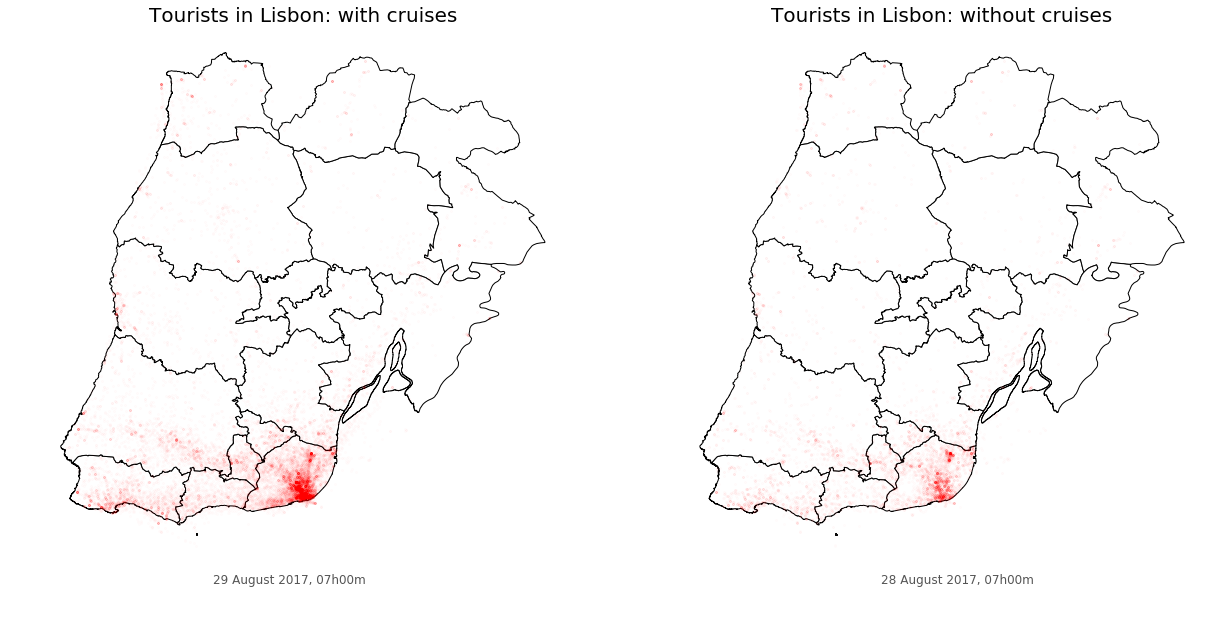

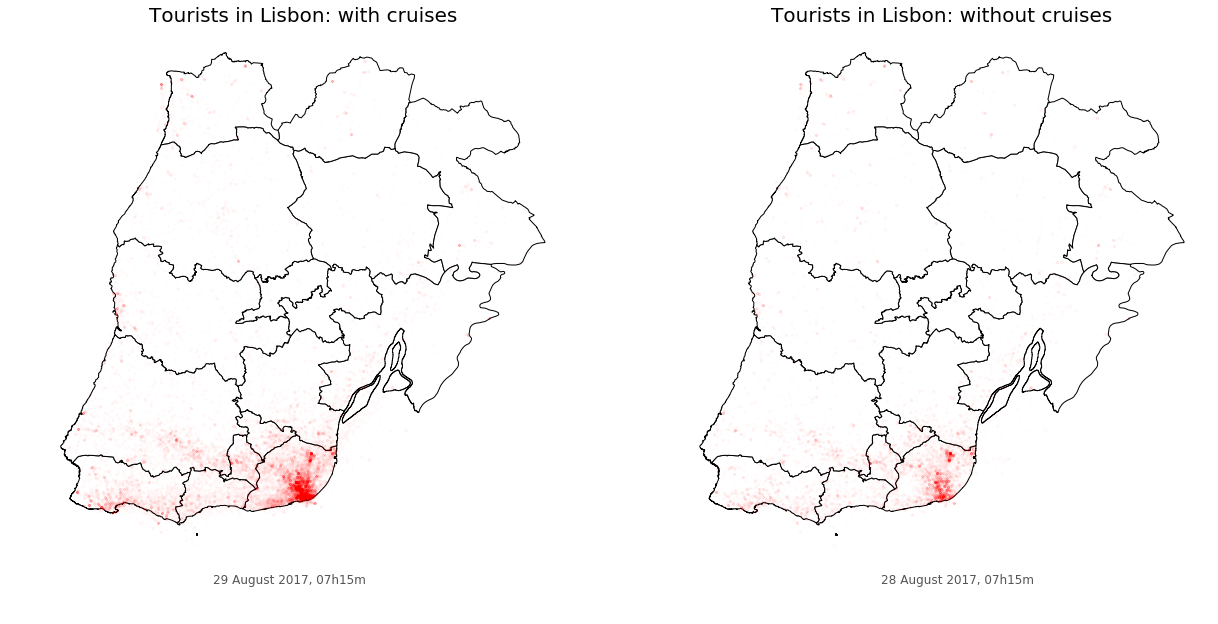

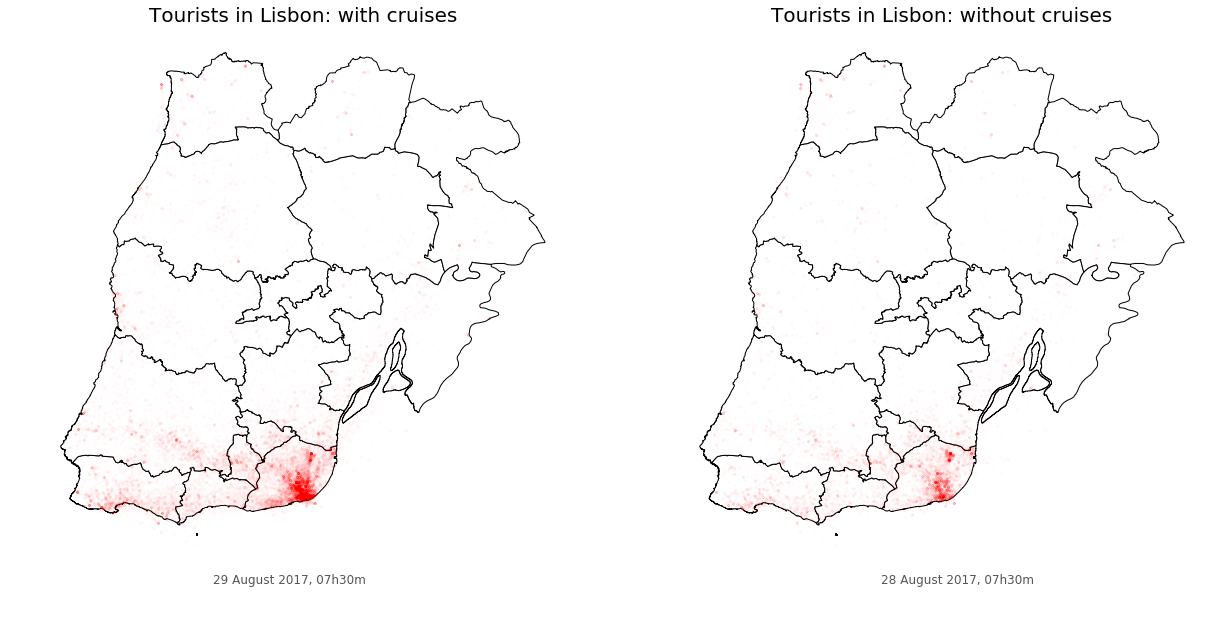

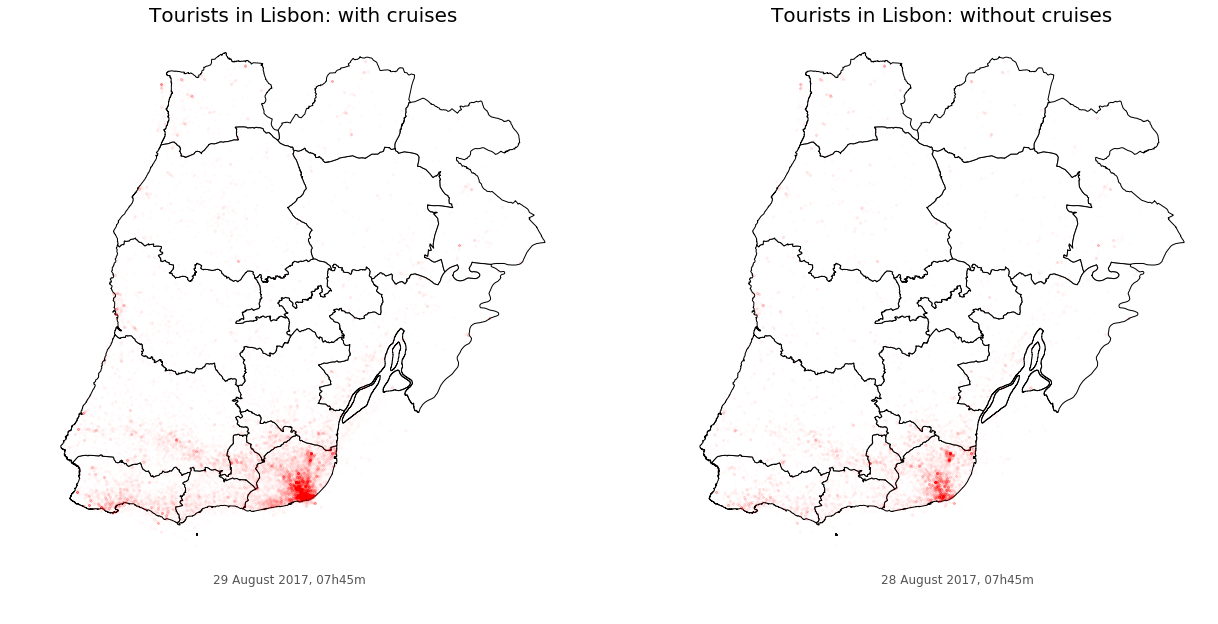

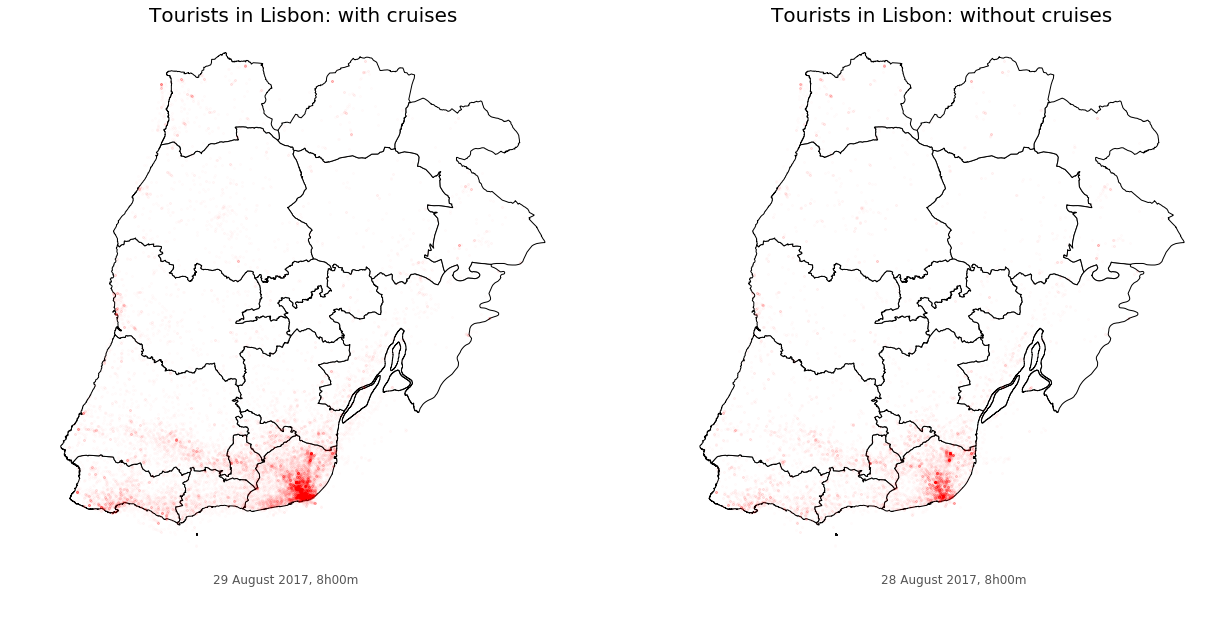

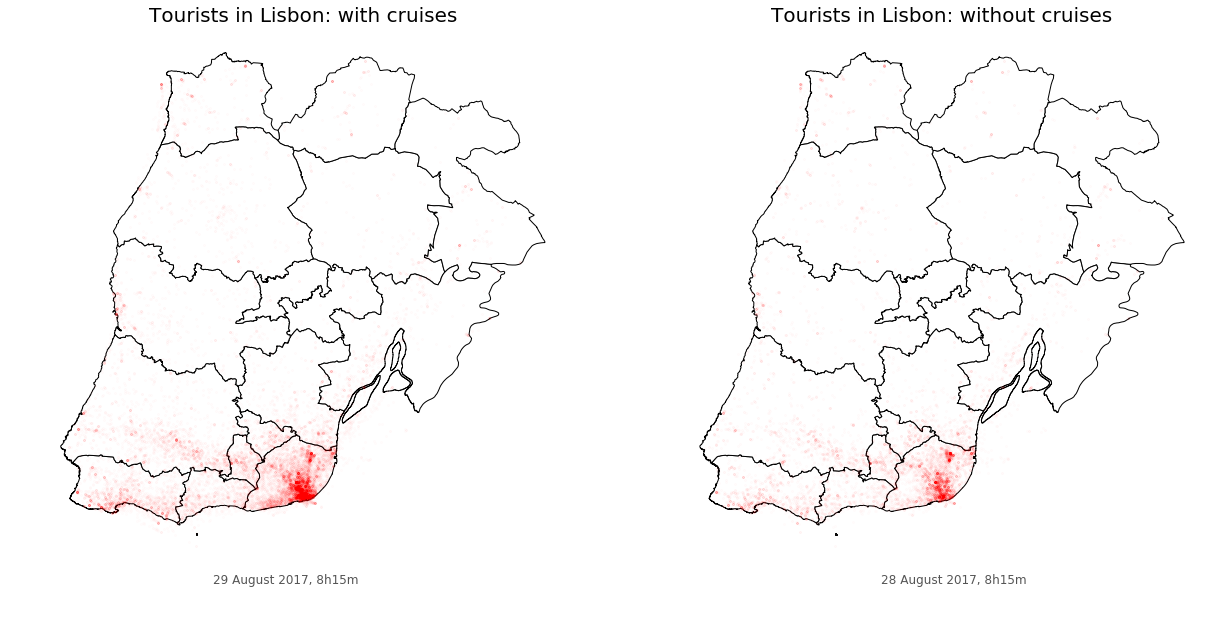

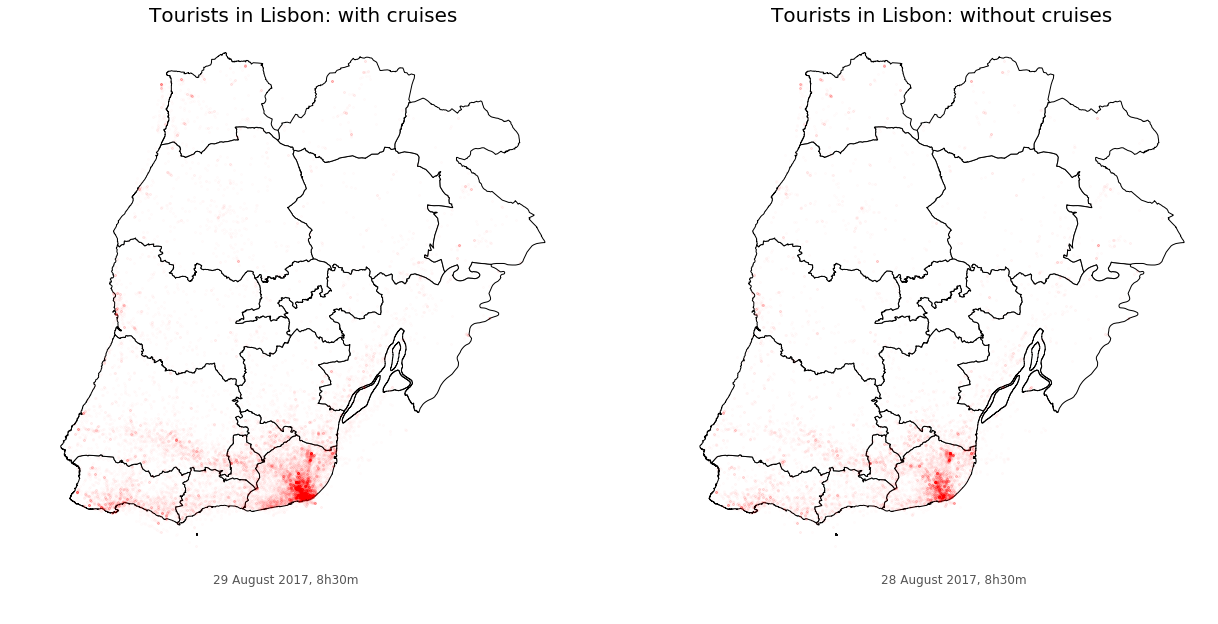

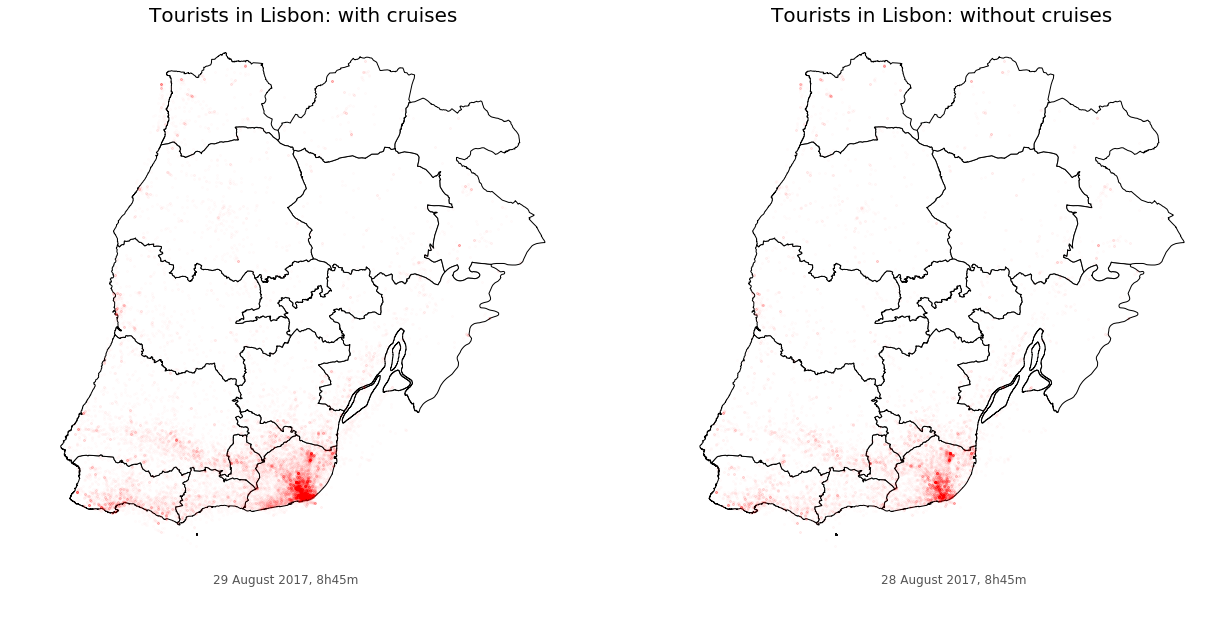

In [6]:

def generate_frames(df_cruises, df_no_cruises, bg, directory, gif_name, alpha=0.2):
    
    iteration = 1
    
    def add_zero_and_format(val):
        if val<10:
            return '0'+str(int(val))
        else:
            return str(int(val))
    
    
    day_cruises = add_zero_and_format(df_cruises.index[0].day)
    day_no_cruises = add_zero_and_format(df_no_cruises.index[0].day)

    
    #hours   = [add_zero_and_format(x) for x in list(range(24))]
    #minutes = [add_zero_and_format(x) for x in list(range(60))]

    hours   = ['07', '8']
    minutes = ['00','15','30','45']
    
    for hour in hours:
        for minute in minutes:
            print('Completion:',str("{0:.2f}".format((iteration/1440.0)*100.0))+'%')
            try:
                
                side_length = 10
                fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(side_length * 2.1, side_length), sharex=True, sharey=True)
                
                # Day with cruises scatter plot
                bg.plot(ax=ax1, color='white', edgecolor='black')
                df_cruises.loc['2017-08-%s %s:%s:00' % (day_cruises, hour, minute)] \
                                .plot(ax=ax1, marker='o', color='red', markersize=5, alpha=alpha)

                ax1.set_title('Tourists in Lisbon: with cruises', fontdict={'fontsize': 20, 'fontweight' : 3})
                ax1.annotate('%s August 2017, %sh%sm' % (day_cruises,hour,minute), xy=(0.175, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
                ax1.axis('off')

                # Day with no cruises scatter plot
                bg.plot(ax=ax2, color='white', edgecolor='black')
                df_no_cruises.loc['2017-08-%s %s:%s:00' % (day_no_cruises,hour, minute)] \
                                .plot(ax=ax2, marker='o', color='red', markersize=5, alpha=alpha)

                ax2.set_title('Tourists in Lisbon: without cruises', fontdict={'fontsize': 20, 'fontweight' : 3})
                ax2.annotate('%s August 2017, %sh%sm' % (day_no_cruises,hour,minute), xy=(0.7225, .08),  xycoords='figure fraction', horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
                ax2.axis('off')
                plt.savefig(fname=directory+'flows_%s_cruises.png' % str(iteration), format='png')
                #plt.close()
            except KeyError as e:
                print(e)
                continue
            iteration+=1
    """
    print('Generating GIF...')
    file_list = glob.glob(directory+'*.eps') # Get all the pngs in the current directory
    list.sort(file_list, key=lambda x: int(x.split('_')[3].split('.eps')[0])) # Sort the images by #, this may need to be tweaked for your use case
    
    with open('image_list.txt', 'w') as file:
        for item in file_list:
            file.write("%s\n" % item)

    os.system('convert @image_list.txt {}.gif'.format(gif_name))
    os.system('rm {}'.format('image_list.txt'))
    """




# configure the generation of the visualization

bg = portugal[['distrito','concelho','geometry']][portugal['distrito']=='Lisboa'].dissolve(by='concelho').reset_index()
generate_frames(cruises29, cruises28, bg, 'frames_flows_cruises/', 'cruises_flows', alpha=0.01)

#iframe = '<iframe src=' + 'cruises_flows' + '.gif' + ' width=100% height=750px></iframe>'
#IPython.display.HTML(iframe)


In [ ]:
cruises29